# **Phishing Website Detection**<a href="#Phishing-Website-Detection" class="anchor-link">¶</a>

## **1. Objective:**<a href="#1.-Objective:" class="anchor-link">¶</a>

A phishing website is a common social engineering method that mimics
trustful uniform resource locators (URLs) and webpages. The objective of
this project is to train machine learning models on the dataset to
predict phishing websites. Both phishing and benign URLs of websites are
gathered to form a dataset and from them required URL and website
content-based features are extracted. The performance level of each
model is measures and compared.

## **2. Loading Data:**<a href="#2.-Loading-Data:" class="anchor-link">¶</a>

The dataset that is given is loaded.

In \[39\]:

    #importing basic packages
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

In \[40\]:

    #Loading the data
    data0 = pd.read_csv('dataset_website.csv')
    data0.head()

Out\[40\]:

|     | index | having_IPhaving_IP_Address | URLURL_Length | Shortining_Service | having_At_Symbol | double_slash_redirecting | Prefix_Suffix | having_Sub_Domain | SSLfinal_State | Domain_registeration_length | ... | popUpWidnow | Iframe | age_of_domain | DNSRecord | web_traffic | Page_Rank | Google_Index | Links_pointing_to_page | Statistical_report | Result |
|-----|-------|----------------------------|---------------|--------------------|------------------|--------------------------|---------------|-------------------|----------------|-----------------------------|-----|-------------|--------|---------------|-----------|-------------|-----------|--------------|------------------------|--------------------|--------|
| 0   | 1     | -1                         | 1             | 1                  | 1                | -1                       | -1            | -1                | -1             | -1                          | ... | 1           | 1      | -1            | -1        | -1          | -1        | 1            | 1                      | -1                 | -1     |
| 1   | 2     | 1                          | 1             | 1                  | 1                | 1                        | -1            | 0                 | 1              | -1                          | ... | 1           | 1      | -1            | -1        | 0           | -1        | 1            | 1                      | 1                  | -1     |
| 2   | 3     | 1                          | 0             | 1                  | 1                | 1                        | -1            | -1                | -1             | -1                          | ... | 1           | 1      | 1             | -1        | 1           | -1        | 1            | 0                      | -1                 | -1     |
| 3   | 4     | 1                          | 0             | 1                  | 1                | 1                        | -1            | -1                | -1             | 1                           | ... | 1           | 1      | -1            | -1        | 1           | -1        | 1            | -1                     | 1                  | -1     |
| 4   | 5     | 1                          | 0             | -1                 | 1                | 1                        | -1            | 1                 | 1              | -1                          | ... | -1          | 1      | -1            | -1        | 0           | -1        | 1            | 1                      | 1                  | 1      |

5 rows × 32 columns



## **3. Familiarizing with Data**<a href="#3.-Familiarizing-with-Data" class="anchor-link">¶</a>

In this step, few dataframe methods are used to look into the data and
its features.

In \[41\]:

    #Checking the shape of the dataset
    data0.shape

Out\[41\]:

    (11055, 32)

In \[42\]:

    #Listing the features of the dataset
    data0.columns

Out\[42\]:

    Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
           'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
           'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
           'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
           'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
           'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
           'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
           'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
           'Statistical_report', 'Result'],
          dtype='object')

In \[43\]:

    #Information about the dataset
    data0.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 11055 entries, 0 to 11054
    Data columns (total 32 columns):
     #   Column                       Non-Null Count  Dtype
    ---  ------                       --------------  -----
     0   index                        11055 non-null  int64
     1   having_IPhaving_IP_Address   11055 non-null  int64
     2   URLURL_Length                11055 non-null  int64
     3   Shortining_Service           11055 non-null  int64
     4   having_At_Symbol             11055 non-null  int64
     5   double_slash_redirecting     11055 non-null  int64
     6   Prefix_Suffix                11055 non-null  int64
     7   having_Sub_Domain            11055 non-null  int64
     8   SSLfinal_State               11055 non-null  int64
     9   Domain_registeration_length  11055 non-null  int64
     10  Favicon                      11055 non-null  int64
     11  port                         11055 non-null  int64
     12  HTTPS_token                  11055 non-null  int64
     13  Request_URL                  11055 non-null  int64
     14  URL_of_Anchor                11055 non-null  int64
     15  Links_in_tags                11055 non-null  int64
     16  SFH                          11055 non-null  int64
     17  Submitting_to_email          11055 non-null  int64
     18  Abnormal_URL                 11055 non-null  int64
     19  Redirect                     11055 non-null  int64
     20  on_mouseover                 11055 non-null  int64
     21  RightClick                   11055 non-null  int64
     22  popUpWidnow                  11055 non-null  int64
     23  Iframe                       11055 non-null  int64
     24  age_of_domain                11055 non-null  int64
     25  DNSRecord                    11055 non-null  int64
     26  web_traffic                  11055 non-null  int64
     27  Page_Rank                    11055 non-null  int64
     28  Google_Index                 11055 non-null  int64
     29  Links_pointing_to_page       11055 non-null  int64
     30  Statistical_report           11055 non-null  int64
     31  Result                       11055 non-null  int64
    dtypes: int64(32)
    memory usage: 2.7 MB

## **4. Visualizing the data**<a href="#4.-Visualizing-the-data" class="anchor-link">¶</a>

Few plots and graphs are displayed to find how the data is distributed
and the how features are related to each other.

In \[44\]:

    #Plotting the data distribution
    data0.hist(bins = 50,figsize = (15,15))
    plt.show()

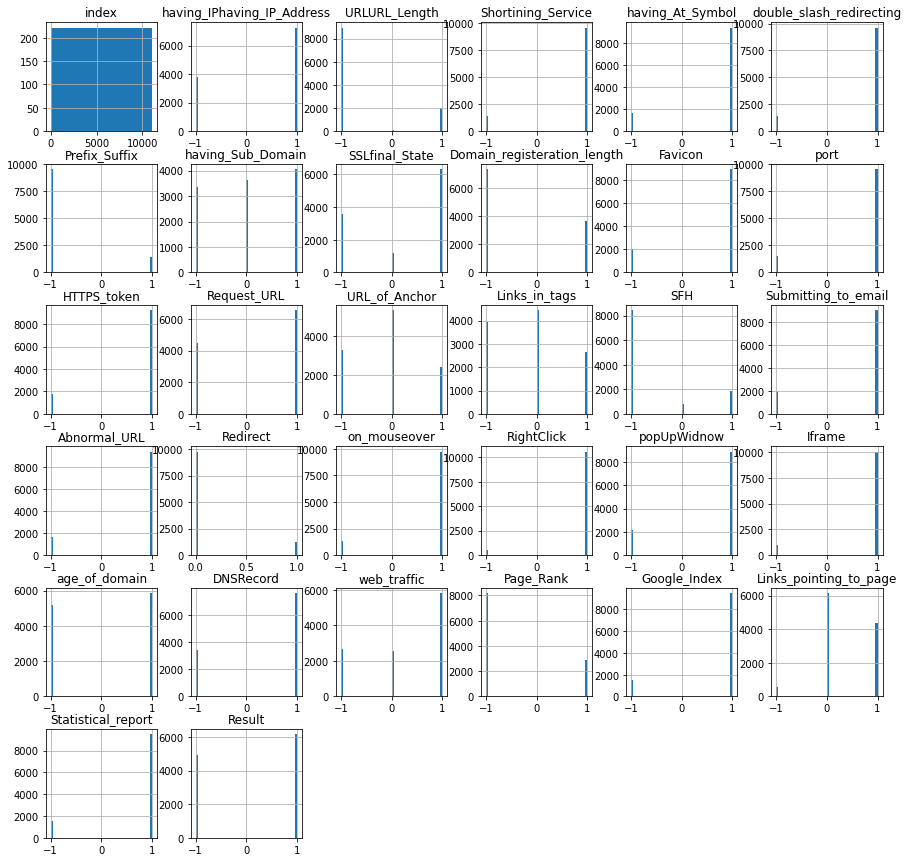

In \[45\]:

    #Correlation heatmap

    plt.figure(figsize=(15,13))
    sns.heatmap(data0.corr())
    plt.show()

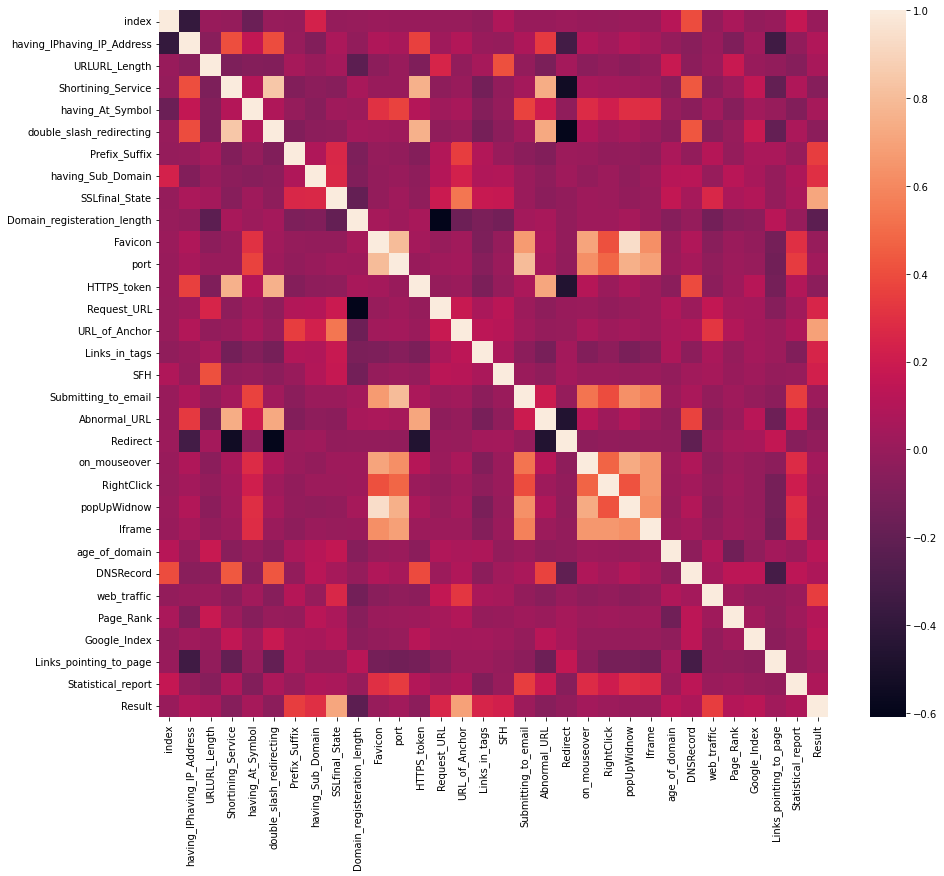

## **5. Data Preprocessing & EDA**<a href="#5.-Data-Preprocessing-&amp;-EDA" class="anchor-link">¶</a>

Here, we clean the data by applying data preprocesssing techniques and
transform the data to use it in the models.

In \[46\]:

    data0.describe()

Out\[46\]:

|       | index        | having_IPhaving_IP_Address | URLURL_Length | Shortining_Service | having_At_Symbol | double_slash_redirecting | Prefix_Suffix | having_Sub_Domain | SSLfinal_State | Domain_registeration_length | ... | popUpWidnow  | Iframe       | age_of_domain | DNSRecord    | web_traffic  | Page_Rank    | Google_Index | Links_pointing_to_page | Statistical_report | Result       |
|-------|--------------|----------------------------|---------------|--------------------|------------------|--------------------------|---------------|-------------------|----------------|-----------------------------|-----|--------------|--------------|---------------|--------------|--------------|--------------|--------------|------------------------|--------------------|--------------|
| count | 11055.000000 | 11055.000000               | 11055.000000  | 11055.000000       | 11055.000000     | 11055.000000             | 11055.000000  | 11055.000000      | 11055.000000   | 11055.000000                | ... | 11055.000000 | 11055.000000 | 11055.000000  | 11055.000000 | 11055.000000 | 11055.000000 | 11055.000000 | 11055.000000           | 11055.000000       | 11055.000000 |
| mean  | 5528.000000  | 0.313795                   | -0.633198     | 0.738761           | 0.700588         | 0.741474                 | -0.734962     | 0.063953          | 0.250927       | -0.336771                   | ... | 0.613388     | 0.816915     | 0.061239      | 0.377114     | 0.287291     | -0.483673    | 0.721574     | 0.344007               | 0.719584           | 0.113885     |
| std   | 3191.447947  | 0.949534                   | 0.766095      | 0.673998           | 0.713598         | 0.671011                 | 0.678139      | 0.817518          | 0.911892       | 0.941629                    | ... | 0.789818     | 0.576784     | 0.998168      | 0.926209     | 0.827733     | 0.875289     | 0.692369     | 0.569944               | 0.694437           | 0.993539     |
| min   | 1.000000     | -1.000000                  | -1.000000     | -1.000000          | -1.000000        | -1.000000                | -1.000000     | -1.000000         | -1.000000      | -1.000000                   | ... | -1.000000    | -1.000000    | -1.000000     | -1.000000    | -1.000000    | -1.000000    | -1.000000    | -1.000000              | -1.000000          | -1.000000    |
| 25%   | 2764.500000  | -1.000000                  | -1.000000     | 1.000000           | 1.000000         | 1.000000                 | -1.000000     | -1.000000         | -1.000000      | -1.000000                   | ... | 1.000000     | 1.000000     | -1.000000     | -1.000000    | 0.000000     | -1.000000    | 1.000000     | 0.000000               | 1.000000           | -1.000000    |
| 50%   | 5528.000000  | 1.000000                   | -1.000000     | 1.000000           | 1.000000         | 1.000000                 | -1.000000     | 0.000000          | 1.000000       | -1.000000                   | ... | 1.000000     | 1.000000     | 1.000000      | 1.000000     | 1.000000     | -1.000000    | 1.000000     | 0.000000               | 1.000000           | 1.000000     |
| 75%   | 8291.500000  | 1.000000                   | -1.000000     | 1.000000           | 1.000000         | 1.000000                 | -1.000000     | 1.000000          | 1.000000       | 1.000000                    | ... | 1.000000     | 1.000000     | 1.000000      | 1.000000     | 1.000000     | 1.000000     | 1.000000     | 1.000000               | 1.000000           | 1.000000     |
| max   | 11055.000000 | 1.000000                   | 1.000000      | 1.000000           | 1.000000         | 1.000000                 | 1.000000      | 1.000000          | 1.000000       | 1.000000                    | ... | 1.000000     | 1.000000     | 1.000000      | 1.000000     | 1.000000     | 1.000000     | 1.000000     | 1.000000               | 1.000000           | 1.000000     |

8 rows × 32 columns



From data distribution graph and correlation matrix, we can conclude
that the following features do not have much impact on the result:

-   having_Sub_Domain
-   Domain_registeration_length
-   Favicon
-   HTTPS_token
-   Request_URL
-   URL_of_Anchor
-   Links_in_tags
-   Submitting_to_email
-   Redirect
-   on_mouseover
-   RightClick
-   age_of_domain
-   web_traffic
-   Page_Rank
-   Google_Index
-   Links_pointing_to_page

In \[47\]:

    #Removing the features which do not have much impact on Result
    data=data0.iloc[:,[0,1,2,3,4,5,6,8,11,16,18,22,23,25,30]]
    data.head()

Out\[47\]:

|     | index | having_IPhaving_IP_Address | URLURL_Length | Shortining_Service | having_At_Symbol | double_slash_redirecting | Prefix_Suffix | SSLfinal_State | port | SFH | Abnormal_URL | popUpWidnow | Iframe | DNSRecord | Statistical_report |
|-----|-------|----------------------------|---------------|--------------------|------------------|--------------------------|---------------|----------------|------|-----|--------------|-------------|--------|-----------|--------------------|
| 0   | 1     | -1                         | 1             | 1                  | 1                | -1                       | -1            | -1             | 1    | -1  | -1           | 1           | 1      | -1        | -1                 |
| 1   | 2     | 1                          | 1             | 1                  | 1                | 1                        | -1            | 1              | 1    | -1  | 1            | 1           | 1      | -1        | 1                  |
| 2   | 3     | 1                          | 0             | 1                  | 1                | 1                        | -1            | -1             | 1    | -1  | -1           | 1           | 1      | -1        | -1                 |
| 3   | 4     | 1                          | 0             | 1                  | 1                | 1                        | -1            | -1             | 1    | -1  | 1            | 1           | 1      | -1        | 1                  |
| 4   | 5     | 1                          | 0             | -1                 | 1                | 1                        | -1            | 1              | 1    | -1  | 1            | -1          | 1      | -1        | 1                  |



In \[48\]:

    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 11055 entries, 0 to 11054
    Data columns (total 15 columns):
     #   Column                      Non-Null Count  Dtype
    ---  ------                      --------------  -----
     0   index                       11055 non-null  int64
     1   having_IPhaving_IP_Address  11055 non-null  int64
     2   URLURL_Length               11055 non-null  int64
     3   Shortining_Service          11055 non-null  int64
     4   having_At_Symbol            11055 non-null  int64
     5   double_slash_redirecting    11055 non-null  int64
     6   Prefix_Suffix               11055 non-null  int64
     7   SSLfinal_State              11055 non-null  int64
     8   port                        11055 non-null  int64
     9   SFH                         11055 non-null  int64
     10  Abnormal_URL                11055 non-null  int64
     11  popUpWidnow                 11055 non-null  int64
     12  Iframe                      11055 non-null  int64
     13  DNSRecord                   11055 non-null  int64
     14  Statistical_report          11055 non-null  int64
    dtypes: int64(15)
    memory usage: 1.3 MB

This leaves us with 14 features & a target column.

In \[49\]:

    #checking the data for null or missing values
    data.isnull().sum()

Out\[49\]:

    index                         0
    having_IPhaving_IP_Address    0
    URLURL_Length                 0
    Shortining_Service            0
    having_At_Symbol              0
    double_slash_redirecting      0
    Prefix_Suffix                 0
    SSLfinal_State                0
    port                          0
    SFH                           0
    Abnormal_URL                  0
    popUpWidnow                   0
    Iframe                        0
    DNSRecord                     0
    Statistical_report            0
    dtype: int64

To even out the distribution while splitting the data into training &
testing sets, we need to shuffle it. This evades the case of overfitting
while model training.

In \[50\]:

    # shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
    data = data.sample(frac=1).reset_index(drop=True)
    data.head()

Out\[50\]:

|     | index | having_IPhaving_IP_Address | URLURL_Length | Shortining_Service | having_At_Symbol | double_slash_redirecting | Prefix_Suffix | SSLfinal_State | port | SFH | Abnormal_URL | popUpWidnow | Iframe | DNSRecord | Statistical_report |
|-----|-------|----------------------------|---------------|--------------------|------------------|--------------------------|---------------|----------------|------|-----|--------------|-------------|--------|-----------|--------------------|
| 0   | 402   | 1                          | -1            | 1                  | 1                | 1                        | -1            | 1              | 1    | -1  | 1            | -1          | 1      | -1        | 1                  |
| 1   | 1403  | 1                          | -1            | 1                  | 1                | 1                        | -1            | 1              | 1    | -1  | -1           | 1           | 1      | -1        | -1                 |
| 2   | 10081 | 1                          | -1            | 1                  | -1               | 1                        | 1             | 1              | 1    | -1  | -1           | 1           | 1      | 1         | 1                  |
| 3   | 2069  | -1                         | -1            | -1                 | 1                | -1                       | -1            | -1             | -1   | -1  | -1           | -1          | -1     | -1        | -1                 |
| 4   | 621   | 1                          | -1            | 1                  | -1               | 1                        | 1             | 1              | 1    | -1  | 1            | 1           | 1      | 1         | 1                  |



From the above execution, it is clear that the data doesnot have any
missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**<a href="#6.-Splitting-the-Data" class="anchor-link">¶</a>

In \[51\]:

    # Sepratating & assigning features and target columns to X & y
    X=data.iloc[:,:14]
    y=data.iloc[:,14]
    X.shape, y.shape

Out\[51\]:

    ((11055, 14), (11055,))

In \[52\]:

    # Splitting the dataset into train and test sets: 80-20 split
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
    X_train.shape, X_test.shape

Out\[52\]:

    ((8844, 14), (2211, 14))

## **7. Machine Learning Models & Training**<a href="#7.-Machine-Learning-Models-&amp;-Training" class="anchor-link">¶</a>

From the dataset above, it is clear that this is a supervised machine
learning task. There are two major types of supervised machine learning
problems, called classification and regression.

This data set comes under classification problem, as the input URL is
classified as phishing (1) or legitimate (0). The supervised machine
learning models (classification) considered to train the dataset in this
notebook are:

-   Decision Tree
-   Random Forest
-   XGBoost
-   Support Vector Machines

In \[53\]:

    #importing packages
    from sklearn.metrics import accuracy_score

In \[54\]:

    # Creating holders to store the model performance results
    ML_Model = []
    acc_train = []
    acc_test = []

    #function to call for storing the results
    def storeResults(model, a,b):
      ML_Model.append(model)
      acc_train.append(round(a, 3))
      acc_test.append(round(b, 3))

### **7.1. Decision Tree Classifier**<a href="#7.1.-Decision-Tree-Classifier" class="anchor-link">¶</a>

Decision trees are widely used models for classification and regression
tasks. Essentially, they learn a hierarchy of if/else questions, leading
to a decision. Learning a decision tree means learning the sequence of
if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not
to be confused with the test set, which is the data we use to test to
see how generalizable our model is). To build a tree, the algorithm
searches over all possible tests and finds the one that is most
informative about the target variable.

In \[55\]:

    # Decision Tree model 
    from sklearn.tree import DecisionTreeClassifier

    # instantiate the model 
    tree = DecisionTreeClassifier(max_depth = 5)
    # fit the model 
    tree.fit(X_train, y_train)

Out\[55\]:

    DecisionTreeClassifier(max_depth=5)

In \[56\]:

    #predicting the target value from the model for the samples
    y_test_tree = tree.predict(X_test)
    y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In \[57\]:

    #computing the accuracy of the model performance
    acc_train_tree = accuracy_score(y_train,y_train_tree)
    acc_test_tree = accuracy_score(y_test,y_test_tree)

    print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
    print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

    Decision Tree: Accuracy on training Data: 0.929
    Decision Tree: Accuracy on test Data: 0.923

In \[58\]:

    #checking the feature improtance in the model
    plt.figure(figsize=(9,7))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

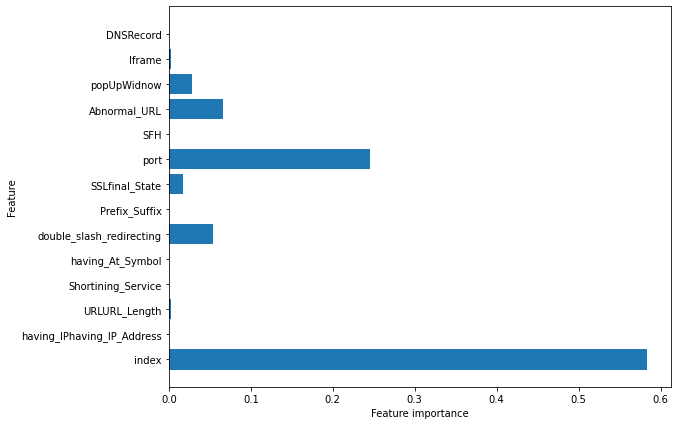

**Storing the results:**

In \[59\]:

    #storing the results. The below mentioned order of parameter passing is important.
    storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**<a href="#7.2.-Random-Forest-Classifier" class="anchor-link">¶</a>

Random forests for regression and classification are currently among the
most widely used machine learning methods.A random forest is essentially
a collection of decision trees, where each tree is slightly different
from the others. The idea behind random forests is that each tree might
do a relatively good job of predicting, but will likely overfit on part
of the data.

If we build many trees, all of which work well and overfit in different
ways, we can reduce the amount of overfitting by averaging their
results. To build a random forest model, you need to decide on the
number of trees to build (the n_estimators parameter of
RandomForestRegressor or RandomForestClassifier). They are very
powerful, often work well without heavy tuning of the parameters, and
don’t require scaling of the data.

In \[60\]:

    # Random Forest model
    from sklearn.ensemble import RandomForestClassifier

    # instantiate the model
    forest = RandomForestClassifier(max_depth=5)

    # fit the model 
    forest.fit(X_train, y_train)

Out\[60\]:

    RandomForestClassifier(max_depth=5)

In \[61\]:

    #predicting the target value from the model for the samples
    y_test_forest = forest.predict(X_test)
    y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In \[62\]:

    #computing the accuracy of the model performance
    acc_train_forest = accuracy_score(y_train,y_train_forest)
    acc_test_forest = accuracy_score(y_test,y_test_forest)

    print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
    print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

    Random forest: Accuracy on training Data: 0.916
    Random forest: Accuracy on test Data: 0.908

In \[63\]:

    #checking the feature improtance in the model
    plt.figure(figsize=(9,7))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), forest.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

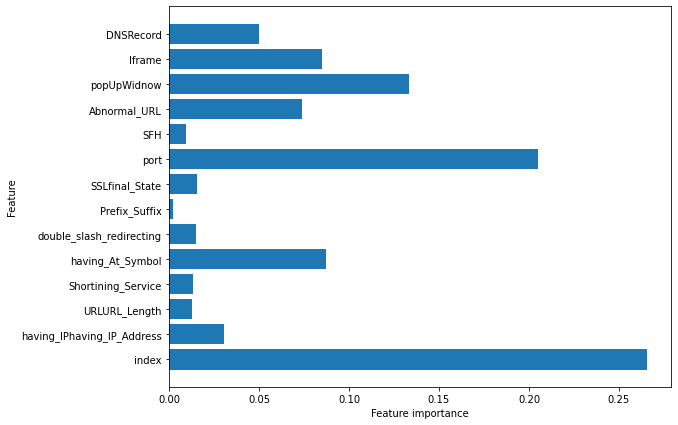

**Storing the results:**

In \[64\]:

    #storing the results. The below mentioned order of parameter passing is important.
    storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.4. XGBoost Classifier**<a href="#7.4.-XGBoost-Classifier" class="anchor-link">¶</a>

XGBoost is one of the most popular machine learning algorithms these
days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the
type of prediction task at hand; regression or classification. XGBoost
is an implementation of gradient boosted decision trees designed for
speed and performance.

In \[65\]:

    #XGBoost Classification model
    from xgboost import XGBClassifier

    # instantiate the model
    xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
    #fit the model
    xgb.fit(X_train, y_train)

Out\[65\]:

    XGBClassifier(learning_rate=0.4, max_depth=7)

In \[66\]:

    #predicting the target value from the model for the samples
    y_test_xgb = xgb.predict(X_test)
    y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In \[67\]:

    #computing the accuracy of the model performance
    acc_train_xgb = accuracy_score(y_train,y_train_xgb)
    acc_test_xgb = accuracy_score(y_test,y_test_xgb)

    print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
    print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

    XGBoost: Accuracy on training Data: 0.965
    XGBoost : Accuracy on test Data: 0.923

**Storing the results:**

In \[68\]:

    #storing the results. The below mentioned order of parameter passing is important.
    storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### **7.6. Support Vector Machines**<a href="#7.6.-Support-Vector-Machines" class="anchor-link">¶</a>

In machine learning, support-vector machines (SVMs, also support-vector
networks) are supervised learning models with associated learning
algorithms that analyze data used for classification and regression
analysis. Given a set of training examples, each marked as belonging to
one or the other of two categories, an SVM training algorithm builds a
model that assigns new examples to one category or the other, making it
a non-probabilistic binary linear classifier.

In \[69\]:

    #Support vector machine model
    from sklearn.svm import SVC

    # instantiate the model
    svm = SVC(kernel='linear', C=1.0, random_state=12)
    #fit the model
    svm.fit(X_train, y_train)

Out\[69\]:

    SVC(kernel='linear', random_state=12)

In \[70\]:

    #predicting the target value from the model for the samples
    y_test_svm = svm.predict(X_test)
    y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In \[71\]:

    #computing the accuracy of the model performance
    acc_train_svm = accuracy_score(y_train,y_train_svm)
    acc_test_svm = accuracy_score(y_test,y_test_svm)

    print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
    print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

    SVM: Accuracy on training Data: 0.899
    SVM : Accuracy on test Data: 0.892

**Storing the results:**

In \[72\]:

    #storing the results. The below mentioned order of parameter passing is important.
    storeResults('SVM', acc_train_svm, acc_test_svm)

## **8. Comparision of Models**<a href="#8.-Comparision-of-Models" class="anchor-link">¶</a>

To compare the models performance, a dataframe is created. The columns
of this dataframe are the lists created to store the results of the
model.

In \[73\]:

    #creating dataframe
    results = pd.DataFrame({ 'ML Model': ML_Model,    
        'Train Accuracy': acc_train,
        'Test Accuracy': acc_test})
    results

Out\[73\]:

|     | ML Model      | Train Accuracy | Test Accuracy |
|-----|---------------|----------------|---------------|
| 0   | Decision Tree | 0.929          | 0.923         |
| 1   | Random Forest | 0.916          | 0.908         |
| 2   | XGBoost       | 0.965          | 0.923         |
| 3   | SVM           | 0.899          | 0.892         |



In \[74\]:

    #Sorting the datafram on accuracy
    results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

Out\[74\]:

|     | ML Model      | Train Accuracy | Test Accuracy |
|-----|---------------|----------------|---------------|
| 2   | XGBoost       | 0.965          | 0.923         |
| 0   | Decision Tree | 0.929          | 0.923         |
| 1   | Random Forest | 0.916          | 0.908         |
| 3   | SVM           | 0.899          | 0.892         |



For the above comparision, it is clear that the **XGBoost Classifier**
works well with this dataset.

So, saving the model for future use.

In \[75\]:

    # save XGBoost model to file
    import pickle
    pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

**Testing the saved model:**

In \[76\]:

    # load model from file
    loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
    loaded_model

Out\[76\]:

    XGBClassifier(learning_rate=0.4, max_depth=7, missing=nan)

## **9. References**<a href="#9.-References" class="anchor-link">¶</a>

-   <https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/>